In [0]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

# K-Means

In [0]:
df = pd.read_csv("USArrests.csv").copy()
df

#K-Means hiyerarşik olmayan kümeleme yöntemidir.

# abd, eyaletlere  göre suç oranları
# murder - cinayet
# assault - saldırı
# urbanPop - nüfus
# rape - tecavüz

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [0]:
df.index = df.iloc[:,0]

In [0]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [0]:
df = df.iloc[:,1:5]

In [0]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [0]:
 df.index.name = None

In [0]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [0]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


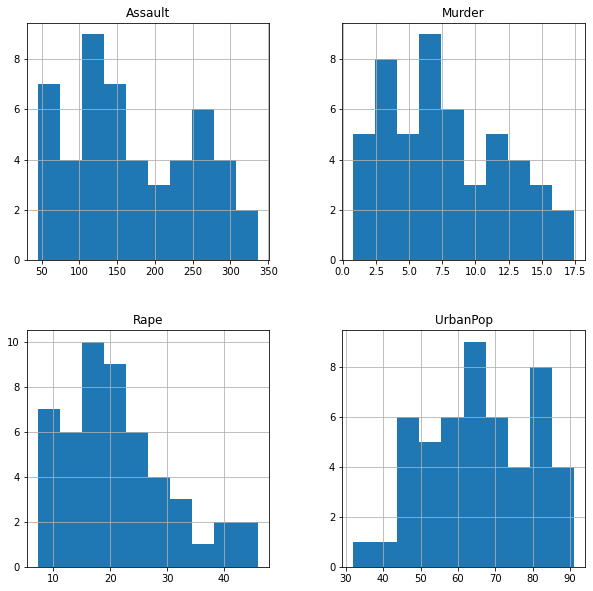

In [0]:
df.hist(figsize=(10, 10));

## Model ve Görselleştirme

In [0]:
kmeans = KMeans(n_clusters=4)
?kmeans
# init : iterasyon sayısı
# n_clusters : küme sayısı, k merkez sayısı.

In [0]:
k_fit = kmeans.fit(df)

In [0]:
k_fit.n_clusters

4

In [0]:
k_fit.cluster_centers_ # merkezler, her değişkene yönelik 4 tane var

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

In [0]:
k_fit.labels_ # her bir gözlemin hangi sınıf a girdiğini gösteriyor.

array([1, 1, 1, 3, 1, 3, 0, 1, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1,
       2, 1, 3, 0, 0, 1, 2, 3, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 2, 3, 3, 0,
       2, 3, 3, 2, 2, 3], dtype=int32)

In [0]:
# görselleştirme

In [0]:
kmeans = KMeans(n_clusters=2)
k_fit = kmeans.fit(df)

In [0]:
kumeler =  k_fit.labels_

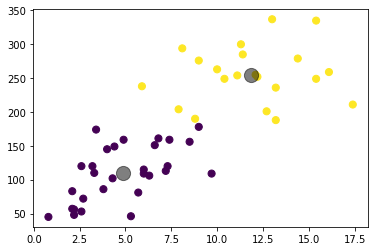

In [0]:
plt.scatter(df.iloc[:,0],df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis") # 2 değişkene indirgeyip kümlerin görselleştirdik.
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha=0.5); # merkezler

In [0]:
# bu şekilde görselleştirmek için bir kaç yol var. Normalde burada 4 değişken vara ama biz bunu 2 değişkenini aldık. 2 boyutta gösterebilmek için
# böyle birşey gerekirdi. bunun için ya pca boyut indirgemesi yapacağız ya ada boyut artıracağız.

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
kmeans = KMeans(n_clusters=3) # küme sayısı
k_fit = kmeans.fit(df) # fitting
kumeler = k_fit.labels_ # kümeler
merkezler = kmeans.cluster_centers_ # kümelerin merkezleri

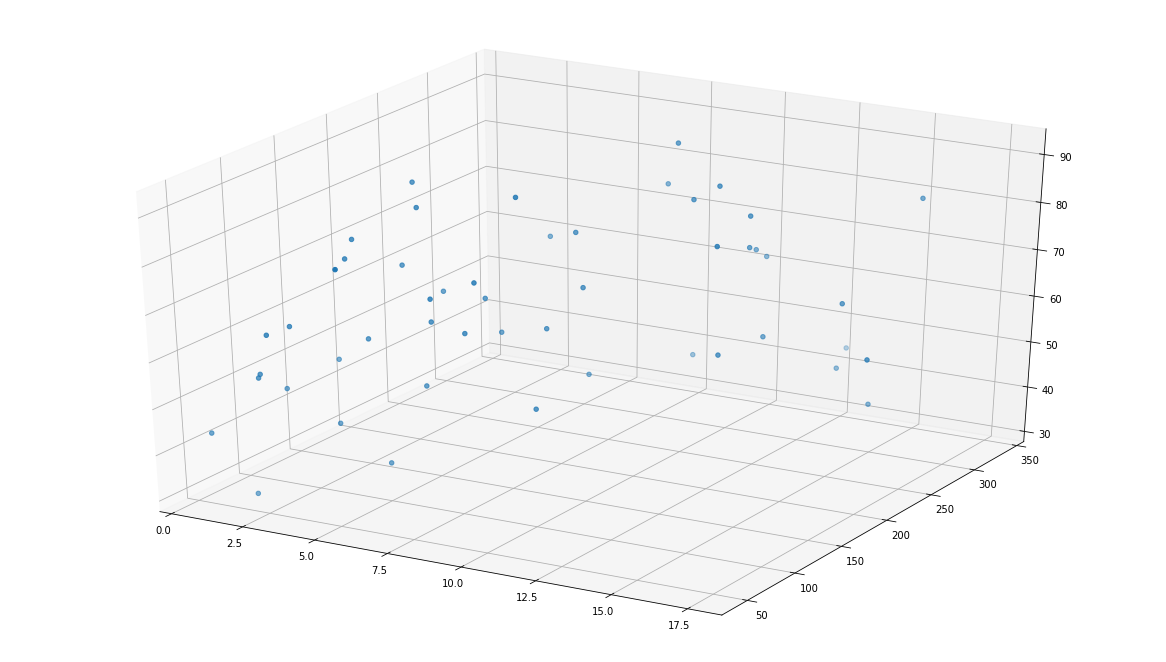

In [0]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

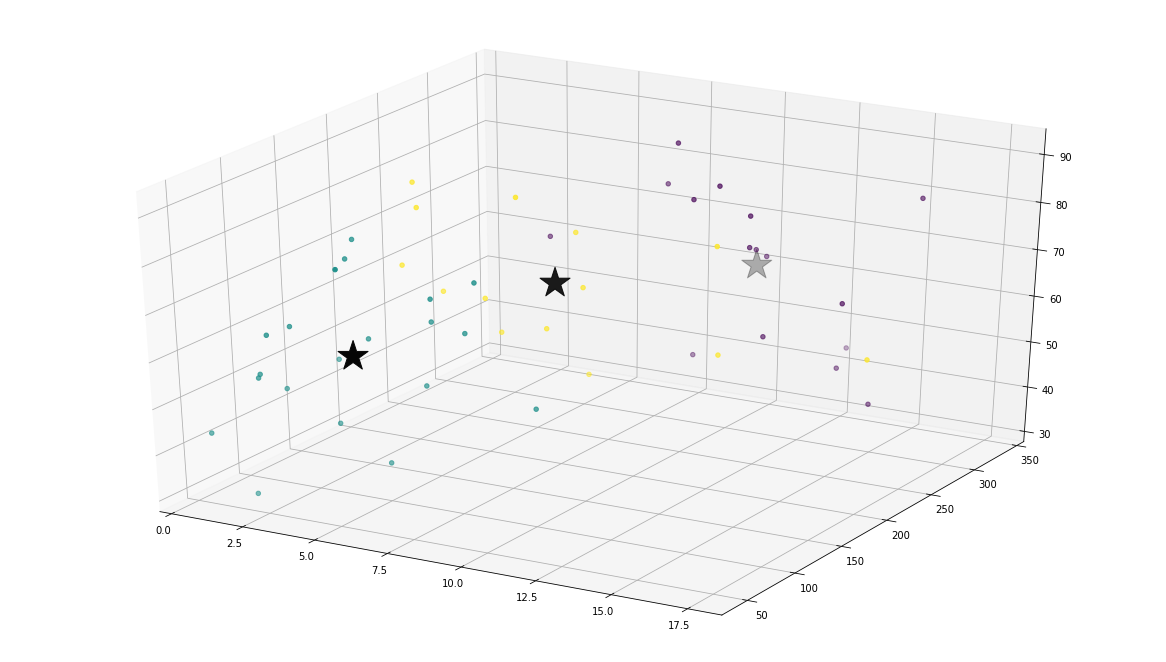

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

In [0]:
kmeans = KMeans(n_clusters=3) # küme sayısı
k_fit = kmeans.fit(df) # fitting
kumeler = k_fit.labels_ # kümeler
merkezler = kmeans.cluster_centers_ # kümelerin merkezleri

In [0]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


In [0]:
df["kume_no"] = kumeler

In [0]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


## Model Tuning

In [0]:
# amacımız küme içi benzerliğin maximum, kümeler arası benerliğin minimum olmasını sağlamak

# bunu için bir kümenin her bir gözlemminin elemanlarının merkeze olan uzaklıklarını topllayım hata(distance-uzaklık) kareler toplamınnı hesaplayacağız..

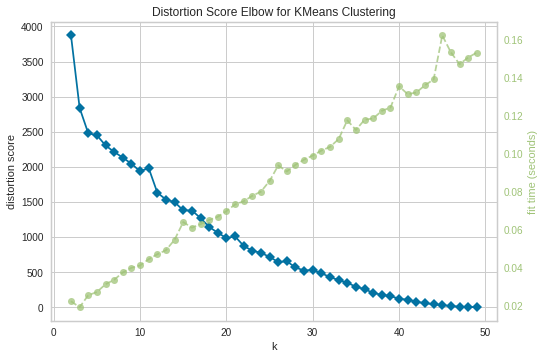

In [0]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer 
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50)) # 2 den 50 ye  kadar küme sayıları deneyecek.
visualizer.fit(df) 
visualizer.poof() 

#görüldüğü gibi küme sayısı arttıkça hata(distance) skoru azalıyor.Ancak bu yanıltıcı olmamalı.Çünkü fazla segmente ayırmak günlük hayat için mantıken saçma ol
# bu yüzden kararı hataya bakarak değil de iş bilgisine bakrak vermek gerekir.

In [0]:
# FİNAL MODELİ

kmeans = KMeans(n_clusters=4) # küme sayısı
k_fit = kmeans.fit(df) # fitting
kumeler = k_fit.labels_ # kümeler
merkezler = kmeans.cluster_centers_ # kümelerin merkezleri

In [0]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


# Hiyerarşik Kümeleme

In [0]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [0]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

 

In [0]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10

SyntaxError: ignored

In [0]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",  # budama işlemi
    p = 4,
    show_contracted = True
);

## Optimum Küme Sayısını Belirleme

In [0]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10

In [0]:
# küme sayısını numerik değerler üzerinden yapmak yerine iş bilgisine dayanarak yapmak gerekir.

In [0]:
from sklearn.cluster import AgglomerativeClustering  # birleştirici  kümeleme için
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean",linkage="ward") # 4 kümeye ayır uzaklık hesabını öklite hesaplarına göre yap, 
# birleştirici method olarak linkage ile ward istatistik methodu kuullan

cluster.fit_predict(df) # verilen değerler  her bir gözlem biriminin ait olduğu kümeyi ifade ediyor.

In [0]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": cluster.fit_predict(df)})[0:10]

In [0]:
df["kume_no"] = cluster.fit_predict(df)

In [0]:
df.head(

# PCA

In [0]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [0]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
df[0:5,0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # iki bileşene indirgedim
pca_fit = pca.fit_transform(df)

In [0]:
bilesen_df = pd.DataFrame(data=pca_fit, columns =["birinci_bilesen","ikinci_bilesen"])

In [0]:
bilesen_df.head() # sonuçta 4 değişkeni 2 değişkene indirgedik

,birinci_bilesen,ikinci_bilesen
0,0.985566,1.133392
1,1.950138,1.073213
2,1.763164,-0.745957
3,-0.141420,1.119797
4,2.523980,-1.542934


In [0]:
pca.explained_variance_ratio_ # 2 tane bileşenin tüm veriyi açıklauabilme oranı
# kümilatif olarak değerlendirdiğimizde % 87 açıklanabilirliğe sahip

array([0.62006039, 0.24744129])

In [0]:
pca = PCA().fit(df)

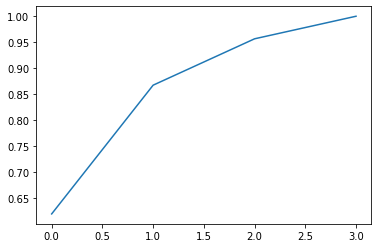

In [0]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))